In [1]:
import torch
import os
import imageio# import imread, imsave
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import random

filepath_ucf101 = 'datasets/UCF-101'
filepath_created_datasets = 'created_datasets'

TODO:
    - makedirs?

In [2]:
folders = os.listdir(filepath_ucf101)

In [3]:
files = [os.path.join(filepath_ucf101, folder, f) for folder in folders for f in os.listdir(os.path.join(filepath_ucf101, folder))]

## Stats

In [4]:
np.unique(stat_fps, return_counts=True)

NameError: name 'stat_fps' is not defined

In [5]:
stat_frames = []
stat_fps = []
stat_height = []
stat_width = []
for file in tqdm(files):
    
    cap = cv2.VideoCapture(file)
    n = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    
    
    stat_fps.append(fps)
    stat_height.append(h)
    stat_width.append(w)
#     frames.append(n)

100%|███████████████████████████████████████████████████████████████████████████| 13320/13320 [00:33<00:00, 398.38it/s]


In [6]:
stat_fps.__len__()

13320

In [38]:
np.mean(frames), np.min(frames), np.max(frames), np.median(frames)

(186.50142642642643, 29, 1776, 167.0)

(array([8.516e+03, 4.217e+03, 5.150e+02, 5.100e+01, 2.000e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  29. ,  203.7,  378.4,  553.1,  727.8,  902.5, 1077.2, 1251.9,
        1426.6, 1601.3, 1776. ]),
 <a list of 10 Patch objects>)

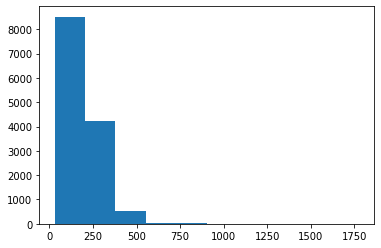

In [37]:
plt.hist(frames)

In [54]:
x = np.array(stat_width)

In [59]:
np.unique(stat_height)

array([226., 240.])

In [60]:
np.where(np.array(stat_height)==226)

(array([9128, 9129, 9130, 9131], dtype=int64),)

In [61]:
np.where(np.array(stat_width)==400)

(array([9128, 9129, 9130, 9131], dtype=int64),)

## datacreator

In [143]:
np.random.randint(0,100000000)

22102019

In [83]:
folders = os.listdir(filepath_ucf101)
files = [os.path.join(filepath_ucf101, folder, f) for folder in folders for f in os.listdir(os.path.join(filepath_ucf101, folder))]
filenames = [f for folder in folders for f in os.listdir(os.path.join(filepath_ucf101, folder))]

In [72]:
k = 1

In [82]:
files[0]

'datasets/UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c01.avi'

In [86]:
file = files[0]

In [90]:
def _get_frames_by_indices(cap, indices):
    frames = []
    
    for index in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, index)
        _, image = cap.read()
        frames.append(image)
        
    return frames


In [136]:
%%time
for file in tqdm(files[:10]):
    cap = cv2.VideoCapture(file)
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # determine subset
    domain = [[i+j for j in range(3)] for i in range(n_frames-2)]
    to_sample = []
    i = 0
    while len(domain) > 0:
        datapoint = random.choice(domain)
        domain = [x for x in domain if sum([x.count(y) for y in datapoint]) == 0]

        frames = _get_frames_by_indices(cap, datapoint)

        for j, frame in enumerate(frames):
            filename, ext = os.path.basename(file).split('.')
            filepath_out = os.path.join(filepath_created_datasets, 'UCF101', f"{filename}__{i}_{j}.jpeg")

            imageio.imsave(filepath_out, frame)

        i += 1
        
        
        


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:18<00:00,  1.66s/it]


Wall time: 18.3 s


In [134]:
i

47

In [103]:
file

'datasets/UCF-101\\ApplyEyeMakeup\\v_ApplyEyeMakeup_g01_c01.avi'

In [102]:
filepath_out

'created_datasets\\UCF101\\v_ApplyEyeMakeup_g01_c01__0_2.avi'

In [85]:
# for file in tqdm(files):
#     cap = cv2.VideoCapture(file)
#     n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
#     # determine subset
#     domain = [[i+j for j in range(3)] for i in range(n_frames-2)]
#     to_sample = []
#     i = 0
#     while domain > 0:
#         datapoint = random.choice(domain)
#         domain = [x for x in domain if sum([x.count(y) for y in datapoint]) == 0]
#         to_sample.append(datapoint)
        
#         for frame in datapoint:
#             filepath_out = os.path.join(filepath_created_datasets, 'UCF101', file)
    
    
#     break

  0%|                                                                                        | 0/13320 [00:00<?, ?it/s]


TypeError: 'float' object cannot be interpreted as an integer

In [126]:
im1 = imageio.imread('created_datasets/UCF101/v_ApplyEyeMakeup_g01_c01__0_0.jpg')

In [127]:
im2 = imageio.imread('created_datasets/UCF101/v_ApplyEyeMakeup_g01_c01__0_0.png')